# business understanding


In [ ]:
# optimize flights to reduce flight delays

# data understanding

In [ ]:
# EDA
import pandas as pd

df = pd.read_csv("/content/combined.csv")
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,1987,11,28,6,2042.0,2025,2105.0,2053,PI,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1,1987,10,22,4,1805.0,1800,1933.0,1905,HP,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2,1987,11,19,4,657.0,655,821.0,804,PI,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,3,1987,11,23,1,1848.0,1835,1944.0,1920,DL,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,4,1987,11,25,3,703.0,655,828.0,821,AA,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape # size of dataset

(22000, 30)

In [ ]:
df.columns # list of columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [ ]:
df.info() # describe datatyeps , value anf columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         22000 non-null  int64  
 1   Year               22000 non-null  int64  
 2   Month              22000 non-null  int64  
 3   DayofMonth         22000 non-null  int64  
 4   DayOfWeek          22000 non-null  int64  
 5   DepTime            22000 non-null  float64
 6   CRSDepTime         22000 non-null  int64  
 7   ArrTime            21919 non-null  float64
 8   CRSArrTime         22000 non-null  int64  
 9   UniqueCarrier      22000 non-null  object 
 10  FlightNum          22000 non-null  int64  
 11  TailNum            14000 non-null  object 
 12  ActualElapsedTime  21917 non-null  float64
 13  CRSElapsedTime     22000 non-null  float64
 14  AirTime            13950 non-null  float64
 15  ArrDelay           21917 non-null  float64
 16  DepDelay           220

In [ ]:
df.describe() # statistical summary

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,21919.000000,22000.000000,22000.000000,...,13996.000000,14000.000000,22000.0,0.0,22000.000000,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000
mean,10999.500000,1997.500000,6.726591,15.919591,4.017909,1458.535955,1422.683364,1581.473014,1580.288636,1229.434182,...,6.626107,16.708357,0.0,NaN,0.003773,9.113570,2.116703,7.632465,0.045428,12.000196
std,6350.997297,6.344433,3.527147,8.717935,1.981814,461.390627,456.661388,510.355497,480.344615,1259.218437,...,25.262758,16.496407,0.0,NaN,0.061308,31.452014,14.602250,21.833752,1.418739,29.955382
min,0.000000,1987.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5499.750000,1992.000000,4.000000,8.000000,2.000000,1109.000000,1050.000000,1235.000000,1234.000000,419.000000,...,4.000000,10.000000,0.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10999.500000,1997.500000,7.000000,16.000000,4.000000,1505.000000,1445.000000,1639.000000,1632.000000,869.000000,...,5.000000,14.000000,0.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16499.250000,2003.000000,10.000000,23.000000,6.000000,1834.000000,1805.000000,2007.000000,1955.000000,1607.000000,...,7.000000,19.000000,0.0,NaN,0.000000,3.000000,0.000000,4.000000,0.000000,9.000000
max,21999.000000,2008.000000,12.000000,31.000000,7.000000,2400.000000,2359.000000,2440.000000,2359.000000,9581.000000,...,1449.000000,1332.000000,0.0,NaN,1.000000,619.000000,307.000000,320.000000,72.000000,350.000000


In [ ]:
df.select_dtypes(include=['object']).columns # categorical columns

Index(['UniqueCarrier', 'TailNum', 'Origin', 'Dest'], dtype='object')

In [ ]:
df.TailNum.unique()

array([nan, 'N869AA', 'N912VJ', ..., 'N103US', 'N234WN', 'N720WN'],
      dtype=object)

In [ ]:
# hypothesis

# data processing

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Year,0
Month,0
DayofMonth,0
DayOfWeek,0
DepTime,0
CRSDepTime,0
ArrTime,81
CRSArrTime,0
UniqueCarrier,0


In [ ]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [ ]:
df.drop(['Unnamed: 0', 'CancellationCode'], axis = 1, inplace = True)

In [ ]:
df.isnull()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,NASDelay,LateAircraftDelay
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
21996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
21997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True


<Axes: >

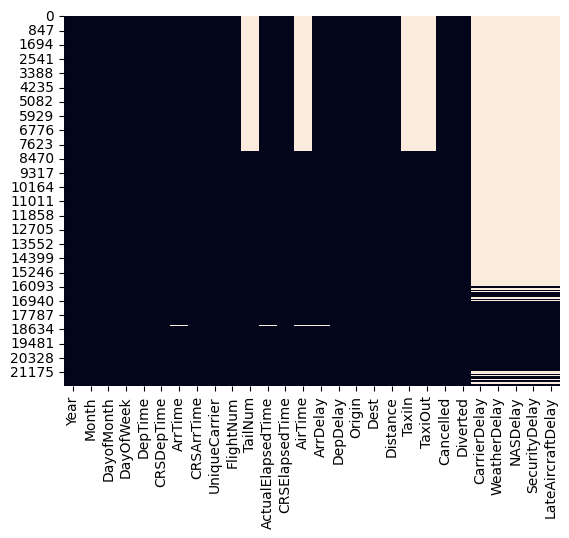

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar = False)

In [ ]:
df.shape

(22000, 26)

In [ ]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,NASDelay,LateAircraftDelay
0,1987,11,28,6,2042.0,2025,2105.0,2053,PI,801,...,MIA,FLL,21.0,NaN,NaN,0,0,NaN,NaN,NaN
1,1987,10,22,4,1805.0,1800,1933.0,1905,HP,226,...,LAX,PHX,370.0,NaN,NaN,0,0,NaN,NaN,NaN
2,1987,11,19,4,657.0,655,821.0,804,PI,79,...,BOS,EWR,200.0,NaN,NaN,0,0,NaN,NaN,NaN
3,1987,11,23,1,1848.0,1835,1944.0,1920,DL,653,...,DFW,DEN,641.0,NaN,NaN,0,0,NaN,NaN,NaN
4,1987,11,25,3,703.0,655,828.0,821,AA,2277,...,SNA,OAK,371.0,NaN,NaN,0,0,NaN,NaN,NaN


In [ ]:
filtered_df = df[
    df[['CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].
                 apply(
                     lambda row:
                     all(
                         x not in [None, ''] and pd.notna(x) for x in row)
                     , axis = 1)
                 ]

In [ ]:
filtered_df.shape

(5107, 28)

In [ ]:
filtered_df.isnull().sum()

,0
Year,0
Month,0
DayofMonth,0
DayOfWeek,0
DepTime,0
CRSDepTime,0
ArrTime,12
CRSArrTime,0
UniqueCarrier,0
FlightNum,0


In [ ]:
filtered_df.dropna(inplace = True, axis =0)

/tmp/ipython-input-9-1966497558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.dropna(inplace = True, axis =0)


In [ ]:
filtered_df.shape


(5095, 28)

In [ ]:
filtered_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
16003,2003,10,14,2,1612.0,1600,1927.0,1911,UA,1278,...,678.0,10.0,21.0,0,0,0.0,0.0,5.0,0.0,11.0
16004,2003,12,5,5,1445.0,1430,1537.0,1530,WN,33,...,239.0,2.0,5.0,0,0,0.0,0.0,0.0,0.0,0.0
16005,2003,6,18,3,1718.0,1715,1847.0,1857,CO,445,...,416.0,3.0,24.0,0,0,0.0,0.0,0.0,0.0,0.0
16008,2003,7,9,3,1354.0,1325,1548.0,1512,MQ,4006,...,137.0,3.0,27.0,0,0,0.0,0.0,9.0,0.0,27.0
16009,2003,12,20,6,1627.0,1620,1905.0,1905,WN,2312,...,588.0,5.0,8.0,0,0,0.0,0.0,0.0,0.0,0.0


In [ ]:
filtered_df.to_csv("delayed_flights.csv", index = False)

In [ ]:
filtered_df.filtered_df.LateAircraftDelay.value_counts()

,count
LateAircraftDelay,
0.0,3672
20.0,40
16.0,39
15.0,39
14.0,38
...,...
165.0,1
132.0,1
215.0,1


In [ ]:
df.drop(['WeatherDelay', 'SecurityDelay'], axis = 1, inplace = True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted', 'CarrierDelay', 'NASDelay',
       'LateAircraftDelay'],
      dtype='object')

In [ ]:
df.TailNum.value_counts()

,count
TailNum,
N506,13
N684,12
N350UA,12
N527,11
N325,11
...,...
N354SW,1
N477WN,1
N923AT,1


In [ ]:
# data analytics

# Data analytics

# data visualization